# **Predicting Insurance Charges: Data Cleaning, Exploratory Analysis, and Regression Modeling**

In this project, we will be performing analytics operations on an insurance database that uses the below mentioned parameters:

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives of this project
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
# Load the data
df = pd.read_csv('insurance.csv', header=None)
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


In [3]:
# Assign column names
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

In [4]:
# Replace '?' with NaN for better handling
df.replace('?', np.nan, inplace=True)

In [5]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [23]:
# Impute missing values

# For categorical column 'smoker', replace NaN with the most frequent entry
most_frequent_smoker = df['smoker'].value_counts().idxmax()
df['smoker'] = df['smoker'].fillna(most_frequent_smoker)

In [24]:
# For continuous column 'age', replace NaN with the mean age
df['age'] = df['age'].fillna(df['age'].astype(float).mean())

In [25]:
# Ensure correct data types
df['age'] = df['age'].astype(int)
df['smoker'] = df['smoker'].astype(int)

In [26]:
# Round 'charges' to 2 decimal places
df['charges'] = df['charges'].astype(float).round(2)


In [27]:
# Confirm the data is cleaned
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None
   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


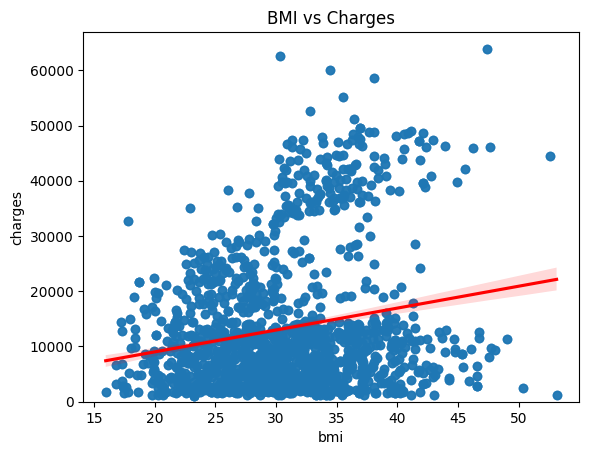

In [11]:
# Exploratory Data Analysis (EDA)
# Scatter plot for BMI vs. charges
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.title("BMI vs Charges")
plt.ylim(0)
plt.show()

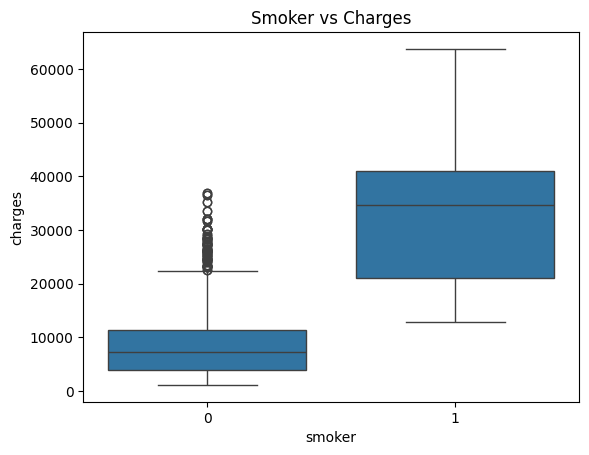

In [12]:
# Boxplot for smoker vs. charges
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Smoker vs Charges")
plt.show()

In [13]:
# Correlation matrix
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


In [14]:
# Linear Regression (Single Variable)
X_single = df[['smoker']]
Y = df['charges']

In [15]:
lm_single = LinearRegression()
lm_single.fit(X_single, Y)
print("Single Variable Linear Regression R²:", lm_single.score(X_single, Y))

Single Variable Linear Regression R²: 0.6221791733924185


In [16]:
# Linear Regression (Multi-Variable)
X_multi = df[["age", "bmi", "no_of_children", "smoker"]]
lm_multi = LinearRegression()
lm_multi.fit(X_multi, Y)
print("Multi-Variable Linear Regression R²:", lm_multi.score(X_multi, Y))

Multi-Variable Linear Regression R²: 0.7495508733481362


In [17]:
# Polynomial Regression with Pipeline
pipeline = Pipeline([
    ('scale', StandardScaler()), 
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), 
    ('model', LinearRegression())
])

In [18]:
pipeline.fit(X_multi, Y)
y_poly_pred = pipeline.predict(X_multi)
print("Polynomial Regression R²:", r2_score(Y, y_poly_pred))

Polynomial Regression R²: 0.8427017553941245


In [19]:
# Train-Test Split for Ridge Regression
X_train, X_test, Y_train, Y_test = train_test_split(X_multi, Y, test_size=0.2, random_state=1)

In [20]:
# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, Y_train)
ridge_y_pred = ridge_model.predict(X_test)
print("Ridge Regression R²:", r2_score(Y_test, ridge_y_pred))

Ridge Regression R²: 0.6747507790130671


In [21]:
# Ridge Regression with Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [22]:
ridge_model.fit(X_train_poly, Y_train)
ridge_y_poly_pred = ridge_model.predict(X_test_poly)
print("Ridge Regression with Polynomial Features R²:", r2_score(Y_test, ridge_y_poly_pred))

Ridge Regression with Polynomial Features R²: 0.7813674844682746
